### Ejercicio 1
**¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?**

Se crea un array de tipo `bool` con 1000 elementos y se calcula el tamaño total en bytes usando `.nbytes`.


In [29]:
import numpy as np

# Crear array de 1000 elementos booleanos
arr = np.zeros(1000, dtype=bool)

# Calcular el tamaño en bytes
tamaño_total = arr.nbytes
print(f"El tamaño en bytes es: {tamaño_total}")


El tamaño en bytes es: 1000


### Ejercicio 2
**Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.**

Se utiliza `np.arange()` en reversa para generar los números pares en orden descendente y se seleccionan los últimos 10.


In [30]:
import numpy as np

# Crear array de pares en [1,100] en orden decreciente
arr = np.arange(100, 1, -1)
pares = arr[arr % 2 == 0]

# Mostrar los 10 últimos
print("Últimos 10 elementos del array:", pares[-10:])


Últimos 10 elementos del array: [20 18 16 14 12 10  8  6  4  2]


### Ejercicio 3
**Dado el siguiente array:**
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1

- Seleccionar con una instrucción el subarray: `0 3 7 4`  
- Después, seleccionar el subarray:  
2 5
8 5


In [31]:
import numpy as np

# Crear array base
arr = np.array([
    [2, 4, 5, 6],
    [0, 3, 7, 4],
    [8, 8, 5, 2],
    [1, 5, 6, 1]
])

# Subarray 0 3 7 4 → segunda fila completa
subarray_1 = arr[1, :]
print("Subarray 1:")
print(subarray_1)
 
# Subarray 2 5 / 8 5 → posiciones [0,2] y [2,2] en columnas 0 y 2
subarray_2 = arr[[0, 2], :][:, [0, 2]]

print("Subarray 2:")
print(subarray_2)


Subarray 1:
[0 3 7 4]
Subarray 2:
[[2 5]
 [8 5]]


### Ejercicio 4
**Dados los arrays `a = [1, 4, 2, 7]` y `b = [1, 3, 2, 9]`, obtenga la media aritmética de la diferencia `(a - b)`.**

Se calcula la resta elemento a elemento y se obtiene la media con `np.mean()`.


In [32]:
import numpy as np

a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

# Diferencia
diferencia = a - b

# Media aritmética
media = np.mean(diferencia)

print("Media de la diferencia:", media)


Media de la diferencia: -0.25


### Ejercicio 5
**Tengo valores de coordenadas (x, y) en las columnas del array:**
1.33 4.5
30.0 10.7
70.2 0.5

Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [33]:
import numpy as np

# Array original
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]
])

# Nueva coordenada a agregar
nueva = np.array([[37.1, -3.6]])

# Concatenar
coordenadas_actualizadas = np.vstack([coordenadas, nueva])

# Mostrar dimensiones
print("Dimensiones del nuevo array:", coordenadas_actualizadas.shape)


Dimensiones del nuevo array: (4, 2)


### Ejercicio 6
**Copiar el array del ejercicio anterior. Transponerlo.**  
**Agregar ahora dos nuevos pares de coordenadas: `(10.8, 3.0)` y `(35.8, 12.0)`.**

Se utiliza `.T` para la transposición y `vstack()` para agregar nuevas filas.


In [34]:
import numpy as np

# Array actualizado del ejercicio anterior
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5],
    [37.1, -3.6]
])

# Transponer
coordenadas_T = coordenadas.T

# Nuevas coordenadas a agregar
nuevas = np.array([[10.8, 3.0], [35.8, 12.0]]).T 

# Agregar columnas (ya que está transpuesto)
resultado = np.hstack([coordenadas_T, nuevas])

print("Array resultante:")
print(resultado)


Array resultante:
[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


### Ejercicio 1
**¿Cuántos Municipios tienen más de 100,000 habitantes?**

Usando el dataset `NucleosPoblacion.csv`, se filtrarán los municipios cuya población sea mayor a 100,000 y se contará cuántos hay.


In [9]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Filtrar municipios con más de 100000 habitantes
municipios_100k = df[df["Poblacion"] > 100000]

# Mostrar cantidad
cantidad = len(municipios_100k)
print(f"Cantidad de municipios con más de 100,000 habitantes: {cantidad}")


Cantidad de municipios con más de 100,000 habitantes: 62


### Ejercicio 2 
**Realice una gráfica de barras sobre la población del top 20 de municipios más poblados, ordénelos de menor a mayor.**

**a)** ¿Cuál es la segunda ciudad más poblada?  
**b)** ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?



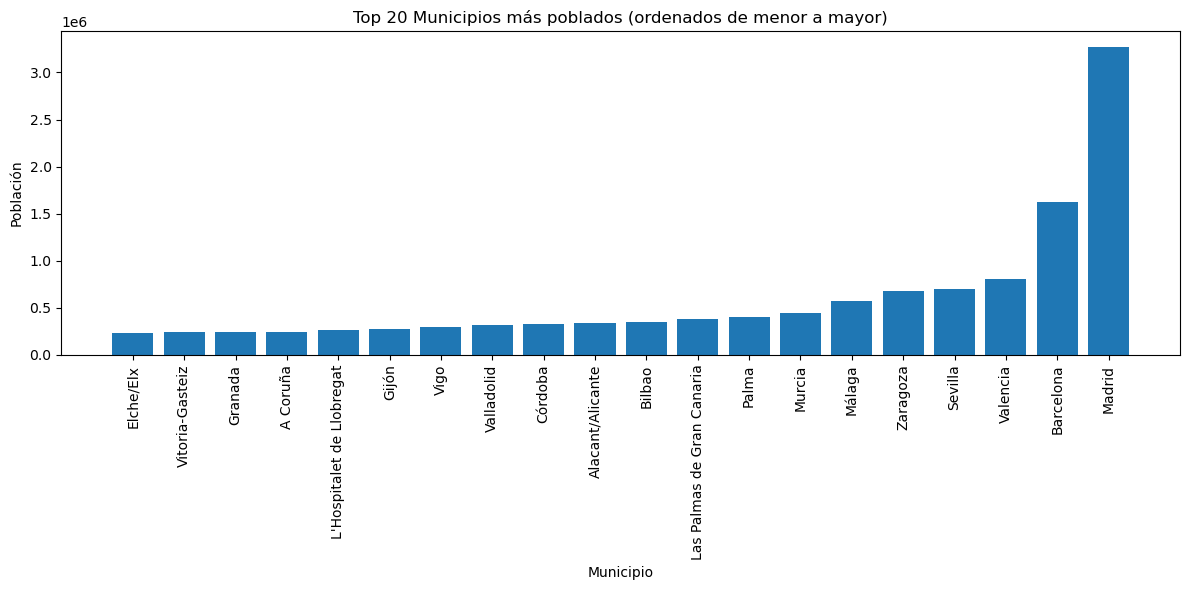

a) Segunda ciudad más poblada: Barcelona
b) Granada ocupa la posición #18 en población.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Eliminar valores nulos en la columna Poblacion
df = df.dropna(subset=["Poblacion"])

# Ordenar de mayor a menor para obtener el top 20
top_20 = df.sort_values(by="Poblacion", ascending=False).head(20)

# Luego ordenamos ese top 20 de menor a mayor para la gráfica
top_20_sorted = top_20.sort_values(by="Poblacion")

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(top_20_sorted["Municipio"], top_20_sorted["Poblacion"])
plt.xticks(rotation=90)
plt.title("Top 20 Municipios más poblados (ordenados de menor a mayor)")
plt.xlabel("Municipio")
plt.ylabel("Población")
plt.tight_layout()
plt.show()

# a) Segunda ciudad más poblada
segunda_ciudad = df.sort_values(by="Poblacion", ascending=False).iloc[1]["Municipio"]
print("a) Segunda ciudad más poblada:", segunda_ciudad)

# b) Posición de Granada en el ranking
ranking = df.sort_values(by="Poblacion", ascending=False).reset_index(drop=True)
pos_granada = ranking[ranking["Municipio"] == "Granada"].index[0] + 1
print(f"b) Granada ocupa la posición #{pos_granada} en población.")



### Ejercicio 3
**¿Cuántos municipios de La Rioja tienen más de 20,000 habitantes?**

Usando el dataset `NucleosPoblacion.csv`, se filtrarán los municipios cuya provincia sea *La Rioja* y cuya población supere los 20,000 habitantes.


In [16]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Filtrar por provincia La Rioja y población mayor a 20000
la_rioja_20k = df[(df["Provincia"] == "La Rioja") & (df["Poblacion"] > 20000)]

# Contar
cantidad = len(la_rioja_20k)
print(f"Cantidad de municipios en La Rioja con más de 20,000 habitantes: {cantidad}")


Cantidad de municipios en La Rioja con más de 20,000 habitantes: 2


### Ejercicio 4
**¿Cuál es el municipio situado más al norte?**

Se buscará el valor máximo en la columna `Y` (latitud) y se mostrará el municipio correspondiente, junto con su provincia y población.


In [17]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Eliminar filas con valores nulos en la latitud
df = df.dropna(subset=["Y"])

# Buscar el municipio con mayor latitud (más al norte)
norte = df.loc[df["Y"].idxmax()]

# Mostrar resultados
print("Municipio más al norte:", norte["Municipio"])
print("Provincia:", norte["Provincia"])
print("Población:", int(norte["Poblacion"]))


Municipio más al norte: Viveiro
Provincia: Lugo
Población: 16211


### Ejercicio 5
**Obtener estadísticas de la población de los municipios en la provincia de Granada.**

Se calcula la media, mediana, desviación estándar, máximo y mínimo de la columna `Poblacion`, filtrando solo los municipios cuya provincia sea *Granada*.


In [18]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Filtrar por provincia Granada
granada = df[df["Provincia"] == "Granada"]

# Eliminar valores nulos
granada = granada.dropna(subset=["Poblacion"])

# Calcular estadísticas
media = granada["Poblacion"].mean()
mediana = granada["Poblacion"].median()
desviacion = granada["Poblacion"].std()
maximo = granada["Poblacion"].max()
minimo = granada["Poblacion"].min()

# Mostrar resultados
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")


Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49
Máximo: 239154.0
Mínimo: 10386.0


### Ejercicio 6
**Realice un histograma con la población de los municipios para cada una de las provincias.**

Se agruparán los municipios por provincia y se graficará un histograma de la población en cada grupo.


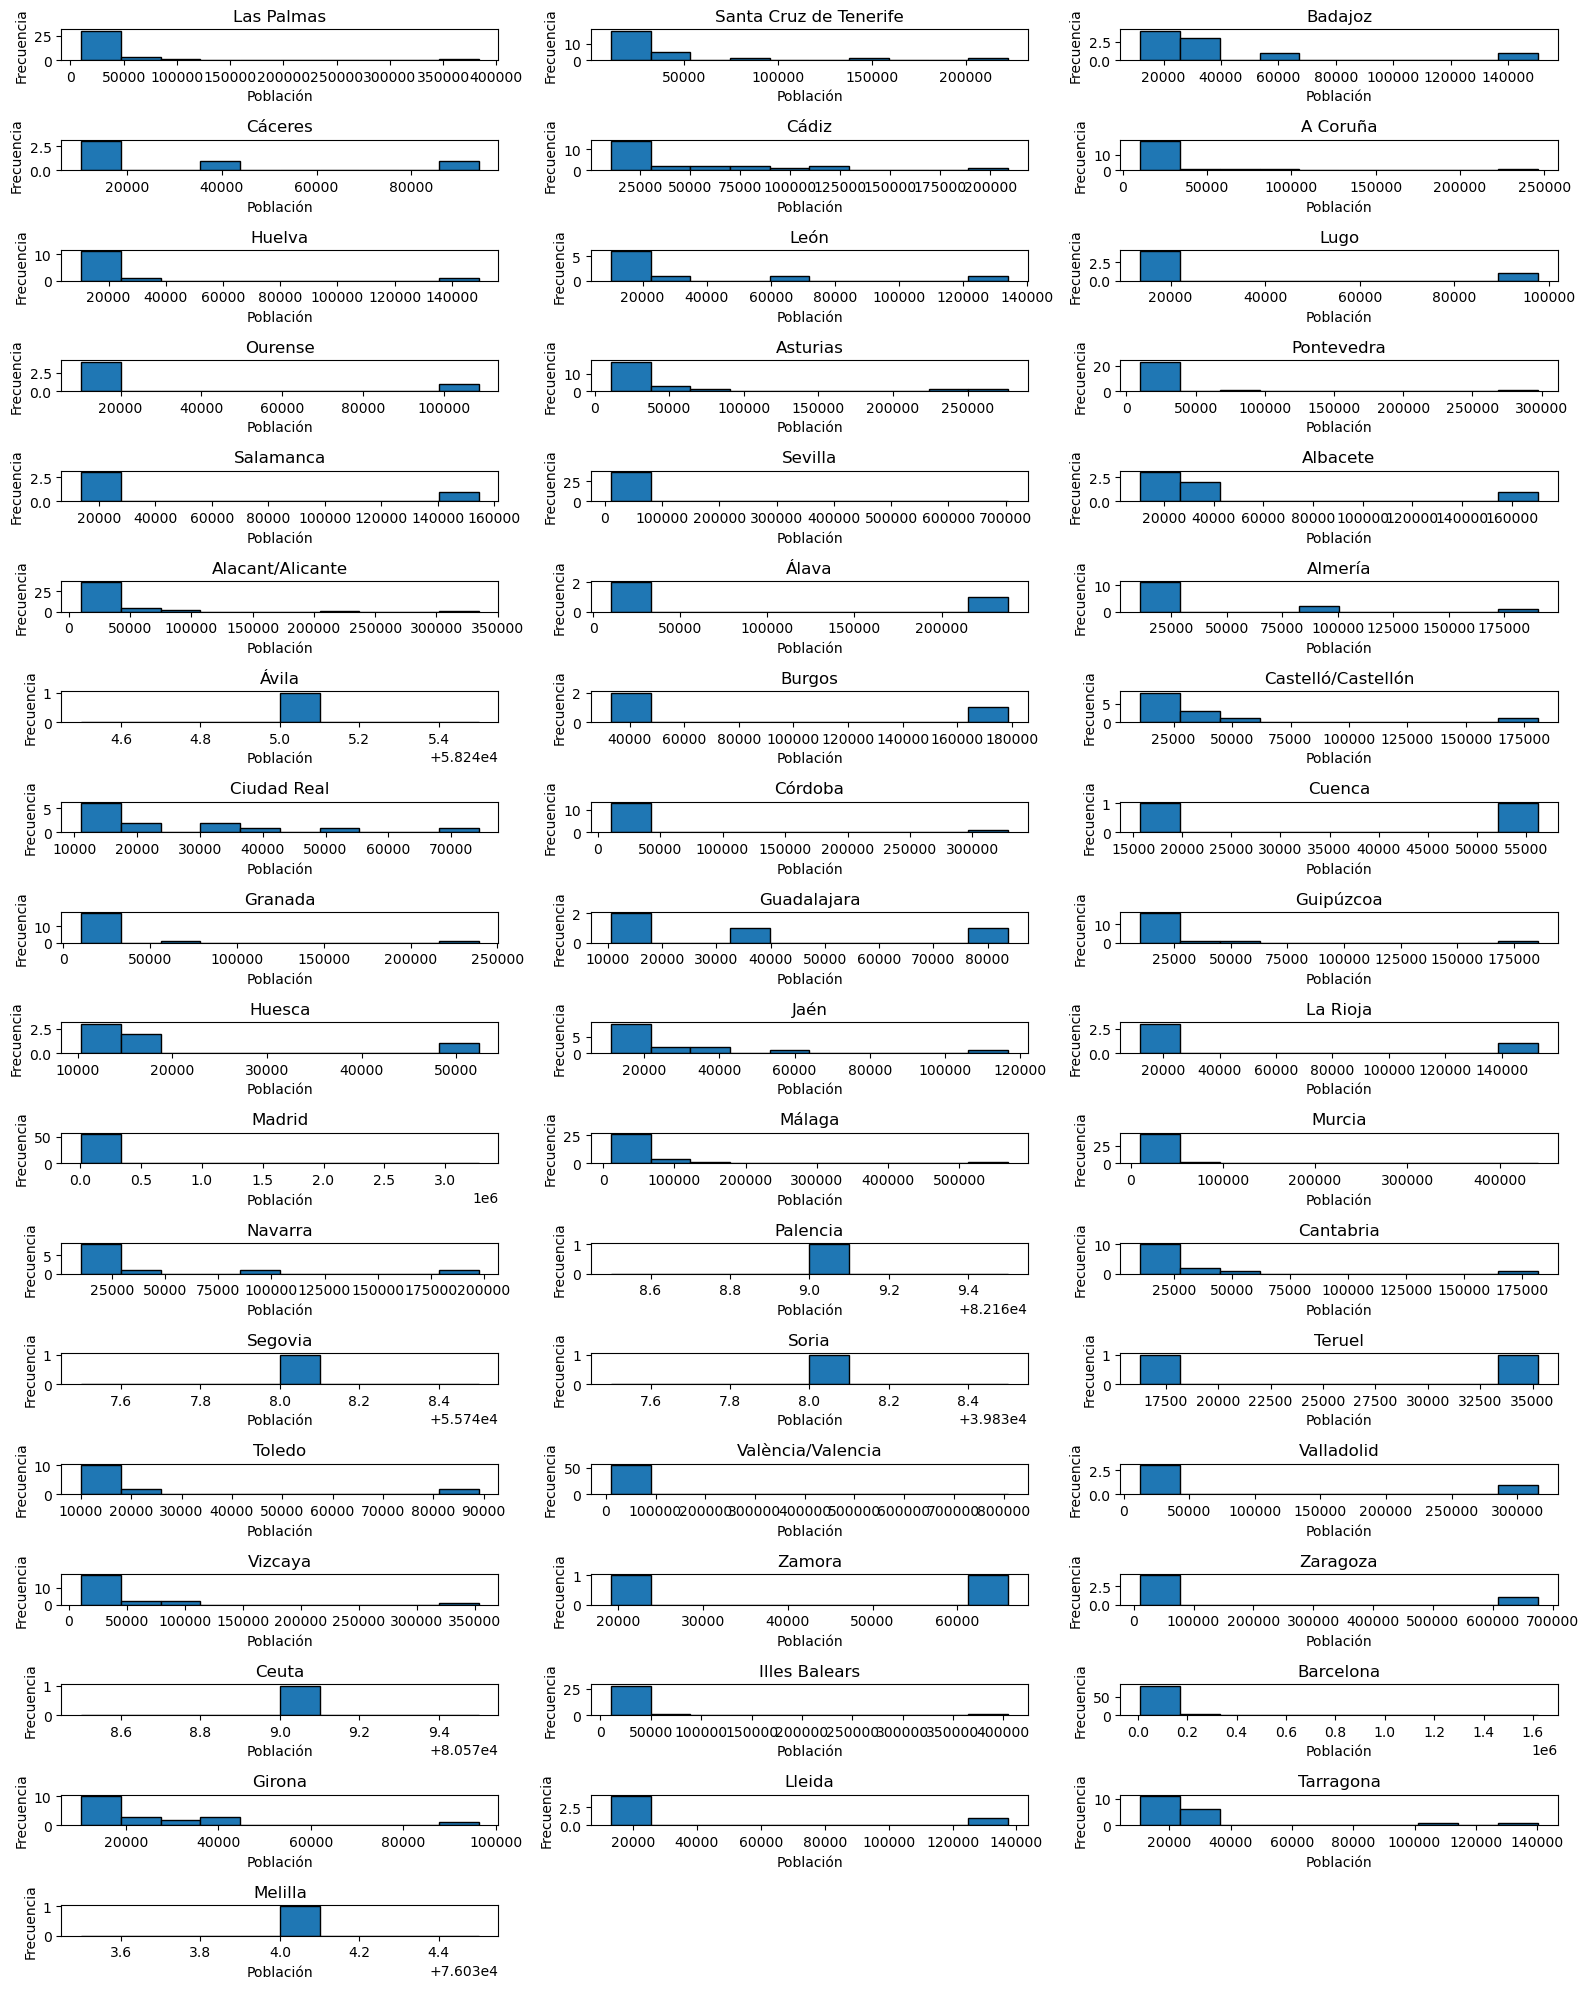

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Eliminar nulos en la columna Poblacion
df = df.dropna(subset=["Poblacion"])

# Obtener lista única de provincias
provincias = df["Provincia"].unique()

# Crear una figura con subplots
fig, axs = plt.subplots(nrows=len(provincias)//3 + 1, ncols=3, figsize=(16, 20))
axs = axs.flatten()

# Dibujar un histograma por provincia
for i, prov in enumerate(provincias):
    datos = df[df["Provincia"] == prov]["Poblacion"]
    axs[i].hist(datos, bins=10, edgecolor='black')
    axs[i].set_title(prov)
    axs[i].set_xlabel("Población")
    axs[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Ejercicio 7
**Seleccione al azar 50 municipios sin repetir y calcule el promedio de la población y la desviación estándar.**

Para garantizar que no haya repetidos, se usará `sample()` de pandas con `n=50` y `random_state` fijo para reproducibilidad.


In [21]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Eliminar nulos en Poblacion y duplicados por municipio si los hay
df = df.dropna(subset=["Poblacion"]).drop_duplicates(subset=["Municipio"])

# Seleccionar 50 municipios aleatorios sin repetir
muestra_50 = df.sample(n=50, random_state=42)

# Calcular estadísticas
promedio = muestra_50["Poblacion"].mean()
desviacion = muestra_50["Poblacion"].std()

# Mostrar resultados
print(f"Promedio de población (50 municipios): {promedio:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")


Promedio de población (50 municipios): 37820.58
Desviación estándar: 54629.05


### Ejercicio 8
**¿Cuál es el municipio más cercano y más lejano a Madrid (excluyendo Madrid)?**

Se usa la fórmula de distancia euclidiana entre las coordenadas `(X, Y)` de cada municipio y las de Madrid. Luego se identifican el mínimo y el máximo.


In [22]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("NucleosPoblacion.csv")

# Filtrar datos válidos
df = df.dropna(subset=["X", "Y", "Municipio"])

# Obtener coordenadas de Madrid
madrid = df[df["Municipio"] == "Madrid"].iloc[0]
x_madrid, y_madrid = madrid["X"], madrid["Y"]

# Excluir Madrid del análisis
df_sin_madrid = df[df["Municipio"] != "Madrid"].copy()

# Calcular distancia euclidiana a Madrid
df_sin_madrid["Distancia"] = np.sqrt((df_sin_madrid["X"] - x_madrid)**2 + (df_sin_madrid["Y"] - y_madrid)**2)

# Municipio más cercano
mas_cercano = df_sin_madrid.loc[df_sin_madrid["Distancia"].idxmin()]["Municipio"]

# Municipio más lejano
mas_lejano = df_sin_madrid.loc[df_sin_madrid["Distancia"].idxmax()]["Municipio"]

print(f"Municipio más cercano a Madrid: {mas_cercano}")
print(f"Municipio más lejano a Madrid: {mas_lejano}")


Municipio más cercano a Madrid: Pozuelo de Alarcón
Municipio más lejano a Madrid: Los Llanos de Aridane
